In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv = pd.read_csv('ADNIMERGE_29Nov2024.csv')

csv.head()

C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_24688\3975975148.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv('ADNIMERGE_29Nov2024.csv')


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0


Dataset per lo studio clinico dell'Alzheimer. Le colonne sono variabili cliniche e genetiche. <br><br>
COLPROT: Protocollo di raccolta dei dati (es. ADNI1, ADNI2, ecc.).<br>
PTID: Identificativo del paziente.<br>
SITE: Sito clinico dove sono stati raccolti i dati.<br>
VISCODE: Codice della visita (es. "bl" per baseline, "m06" per 6 mesi, ecc.). Insieme al PTID formano la Primary key del dominio <br>
EXAMDATE: Data dell'esame clinico.<br>
DX_bl: Diagnosi alla baseline (es. CN = Sano, MCI = Mild Cognitive Impairment (stadio intermedio), AD = Alzheimer).<br>
DX: Diagnosi corrente.<br>
AGE: Età del partecipante al momento della visita. <br>
PTGENDER: Genere del partecipante (Male/Female).<br>
PTEDUCAT: formazione ed educazione del paziente.<br>
PTETHCAT: etnia.<br>
PTRACCAT: Colore della pelle ("razza", es. "White", "Black").<br>
PTMARRY: Stato civile (es. "Married", "Divorced").<br>

In [4]:
print(f"il numero di righe è: {len(csv)}")
print(f"il numero delle righe e delle colonne è: {csv.shape}")

il numero di righe è: 16421
il numero delle righe e delle colonne è: (16421, 116)


In [5]:
print(f"Le colonne sono: {csv.columns}")
csv.dtypes

Le colonne sono: Index(['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER',
       ...
       'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'FBB_bl', 'Years_bl',
       'Month_bl', 'Month', 'M', 'update_stamp'],
      dtype='object', length=116)


RID               int64
COLPROT          object
ORIGPROT         object
PTID             object
SITE              int64
                 ...   
Years_bl        float64
Month_bl        float64
Month             int64
M                 int64
update_stamp     object
Length: 116, dtype: object

In [6]:
print(f"il numero di valori nulli per ogni colonna è: {csv.isnull().sum()}")

il numero di valori nulli per ogni colonna è: RID             0
COLPROT         0
ORIGPROT        0
PTID            0
SITE            0
               ..
Years_bl        0
Month_bl        0
Month           0
M               0
update_stamp    0
Length: 116, dtype: int64


In [7]:
null_col = csv.isnull().sum()
print(f"Le colonne con valori nulli sono: {null_col[null_col > 0]}")
print(f"totale colonne con valori nulli: {(null_col > 0).sum()}")
print(f"totale colonne senza valori nulli: {(null_col == 0).sum()}")

Le colonne con valori nulli sono: DX_bl         11
AGE            9
PTMARRY        1
APOE4        365
FDG        12728
           ...  
PTAU_bl     6338
FDG_bl      5201
PIB_bl     16267
AV45_bl     8585
FBB_bl     15322
Length: 98, dtype: int64
totale colonne con valori nulli: 98
totale colonne senza valori nulli: 18


In [8]:
csv["DX"].unique()

array(['CN', 'Dementia', 'MCI', nan], dtype=object)

In [9]:
csv["DX"].value_counts()

DX
MCI         4989
CN          4020
Dementia    2449
Name: count, dtype: int64

Al momento della visita corrente, la maggior parte dei pazienti presenta uno stato intermedio di alzheimer.

In [10]:
csv["DX_bl"].value_counts()

DX_bl
LMCI    5275
CN      4904
EMCI    2995
AD      1751
SMC     1485
Name: count, dtype: int64

Al momento della prima visita, la maggior parte dei pazienti presenta una forma più avanzata dello stadio intermedio.

In [11]:
csv["DX_bl"].unique()

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

LMCI = forma più avanzata dello stato intermedio<br>
SMC = stadio che precede l'mci, senza però deficit cognitivi evidenti sulla memoria<br>
EMCI = declino cognitivo lieve

In [12]:
csv["PTETHCAT"].unique()

array(['Not Hisp/Latino', 'Hisp/Latino', 'Unknown'], dtype=object)

In [13]:
csv["PTETHCAT"].value_counts()

PTETHCAT
Not Hisp/Latino    15798
Hisp/Latino          550
Unknown               73
Name: count, dtype: int64

C'è un bias nel csv di info, sbilanciato a favore dei non ispanici.

In [14]:
csv["PTGENDER"].value_counts()

PTGENDER
Male      8981
Female    7440
Name: count, dtype: int64

Il csv in relazione al genere sembra bilanciato, non ci sono bias nei dati

In [15]:
csv["PTRACCAT"].unique()

array(['White', 'More than one', 'Black', 'Asian', 'Am Indian/Alaskan',
       'Unknown', 'Hawaiian/Other PI'], dtype=object)

In [16]:
csv["PTRACCAT"].value_counts()

PTRACCAT
White                15101
Black                  760
Asian                  303
More than one          186
Unknown                 35
Am Indian/Alaskan       28
Hawaiian/Other PI        8
Name: count, dtype: int64

Il csv anche in relazione al gruppo etnico non appare bilanciato.

1) ANALISI SULLA PROGRESSIONE DELLE DIAGNOSI

<b>Distribuzione delle diagnosi correnti e alla baseline per genere</b><br> Questa distribuzione è utile per capire eventuali differenze di genere nella prevalenza delle diagnosi. 
1) Ad es., ricerche online suggeriscono che le donne potrebbero avere un rischio maggiore di sviluppare malattie come l'Alzheimer rispetto agli uomini. 
2) Ruolo del genere:  può essere un fattore (di rischio o protettivo) nella determinazione della diagnosi? Influisce sulla progressione della malattia? 

In [17]:
csv_gender_dx = csv.groupby("PTGENDER")["DX"].value_counts().unstack()
csv_gender_dxbl = csv.groupby("PTGENDER")["DX_bl"].value_counts().unstack()

print(f"diagnosi alla baseline x gender: \n{csv_gender_dxbl}")

diagnosi alla baseline x gender: 
DX_bl       AD    CN  EMCI  LMCI  SMC
PTGENDER                             
Female     749  2464  1318  1988  913
Male      1002  2440  1677  3287  572


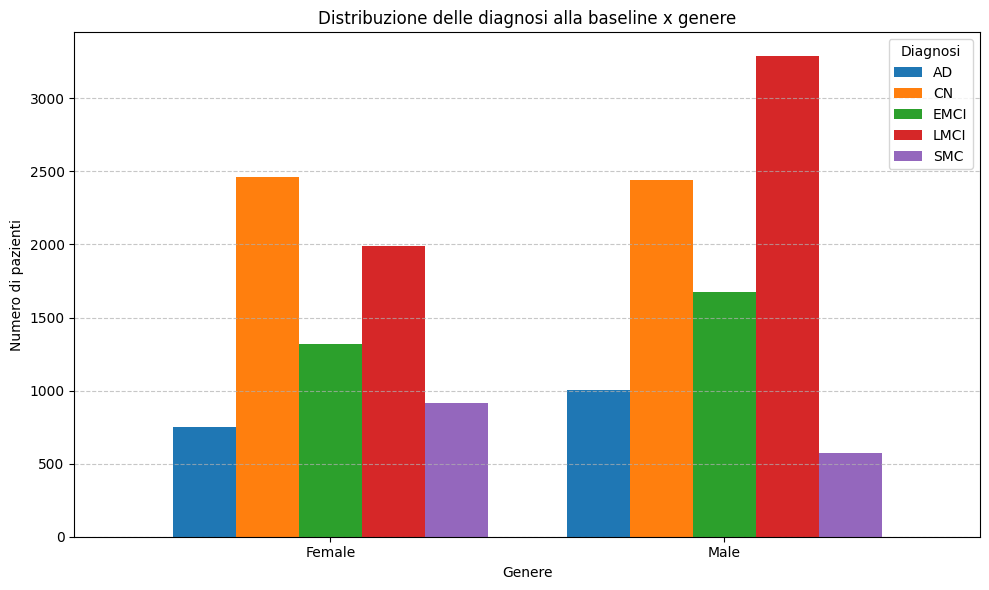

In [18]:
csv_gender_dxbl.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Distribuzione delle diagnosi alla baseline x genere')
plt.xlabel('Genere')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=0)
plt.legend(title='Diagnosi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Quindi notiamo che alla baseline, gli uomini presentano una maggiore prevalenza di compromissione cognitiva e alzheimer rispetto alle donne. Mentre le donne hanno una maggiore prevalenza di diagnosi di normalità. 

In [19]:
print(f"diagnosi per gender: \n{csv_gender_dx}")

diagnosi per gender: 
DX          CN  Dementia   MCI
PTGENDER                      
Female    2132      1052  1992
Male      1888      1397  2997


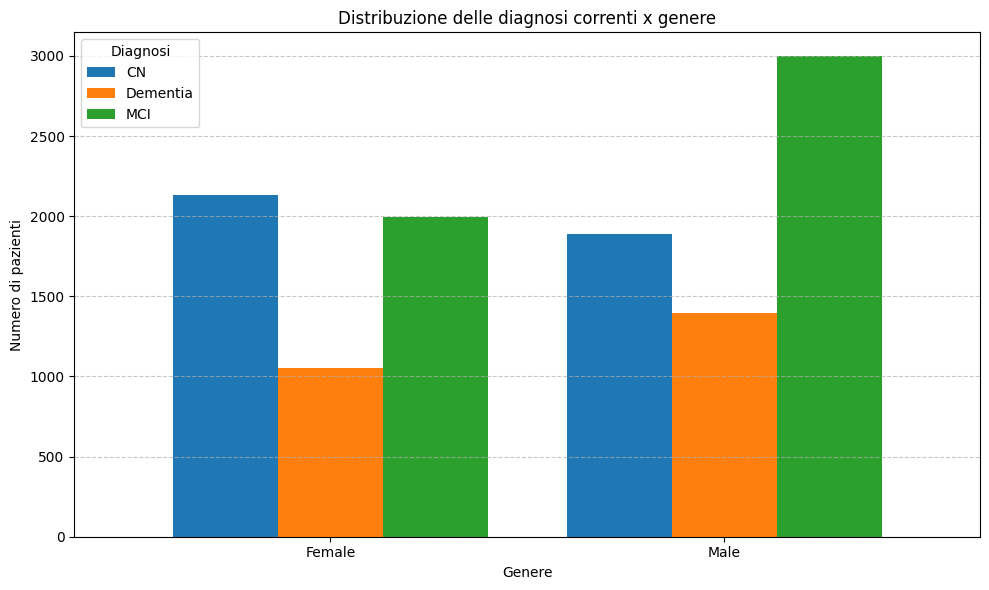

In [20]:
csv_gender_dx.plot(kind="bar", figsize=(10, 6), width=0.8)
plt.title("Distribuzione delle diagnosi correnti x genere")
plt.xlabel('Genere')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=0)
plt.legend(title='Diagnosi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Attualmente, quindi, deduciamo che sono più le donne ad essere sane rispetto agli uomini. Gli uomini soffrono maggiormente di demenza in stato intermedio.<br>
<b>CONFRONTI e CONCLUSIONI:</b><br>
Alla baseline, la maggior parte dei pazienti (donne e uomini) era prevalentemente 
Cognitivamente Normale. Queste diagnosi sono però diminuite rispetto alla baseline. Quindi hanno progredito verso diagnosi di MCI o Dementia. Infatti, le diagnosi di MCI sono aumentate significativamente, per entrambi. La categoria è cresciuta, arricchendosi di pazienti che alla baseline avevano SMC e EMCI. Quindi la progressione della malattia coinvolge anche chi era in condizioni lievi. Infine anche le diagnosi di Dementia sono aumentate (ma in misura minore), quindi la progressione è più lenta e moderata. <br>
Le donne sembrano avere una prevelenza leggermente maggiore di CN  rispetto agli uomini (che invece mostrano una prevalenza di MCI e Dementia).

<b>DISTRIBUZIONE DELLE DIAGNOSI CORRENTI E ALLA BASELINE X ETNIA</b>

Notare le differenze significative nella distribuzione delle diagnosi tra i gruppi etnici potrebbe riflettere disparità nell'accesso alle cure mediche e ai trattamenti. Ma anche differenze nei fattori di rischio genetici o ambientali.

In [21]:
etnia_dx = csv.groupby("PTETHCAT")["DX"].value_counts().unstack()
etnia_dxbl = csv.groupby("PTETHCAT")["DX_bl"].value_counts().unstack()

print(f"Distribuzione delle diagnosi alla baseline x etnia: \n{etnia_dxbl}")

Distribuzione delle diagnosi alla baseline x etnia: 
DX_bl              AD    CN  EMCI  LMCI   SMC
PTETHCAT                                     
Hisp/Latino        42   144   141   142    81
Not Hisp/Latino  1694  4740  2840  5121  1392
Unknown            15    20    14    12    12


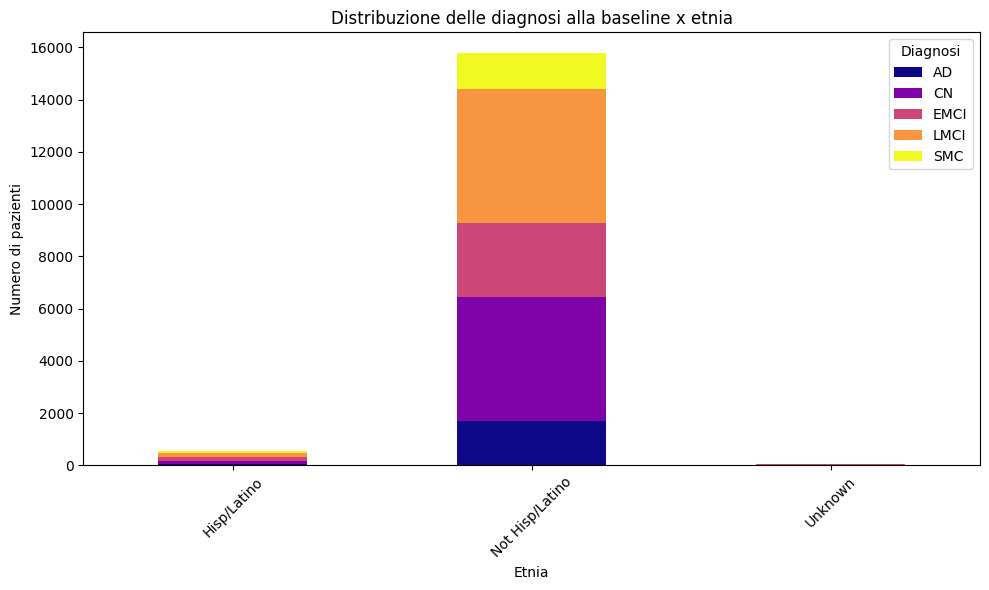

In [22]:
etnia_dxbl.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuzione delle diagnosi alla baseline x etnia')
plt.xlabel('Etnia')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

Notiamo che, a prescindere dalle comparazioni che sono viziate dal fatto che i non ispanici/latini sono la maggior parte dei pazienti (quindi trovano il tempo che trovano), le diagnosi alla baseline per tutte le etnie indistintamente mostrano una prevalenza di individui sani o pazienti con demenza in uno stato più avanzato rispetto allo stadio intermedio (LMCI). SMC, EMCI ed AD meno comuni. 

In [23]:
print(f"Distribuzione delle diagnosi correnti x etnia: \n{etnia_dx}")

Distribuzione delle diagnosi correnti x etnia: 
DX                 CN  Dementia   MCI
PTETHCAT                             
Hisp/Latino       166        58   177
Not Hisp/Latino  3829      2380  4796
Unknown            25        11    16


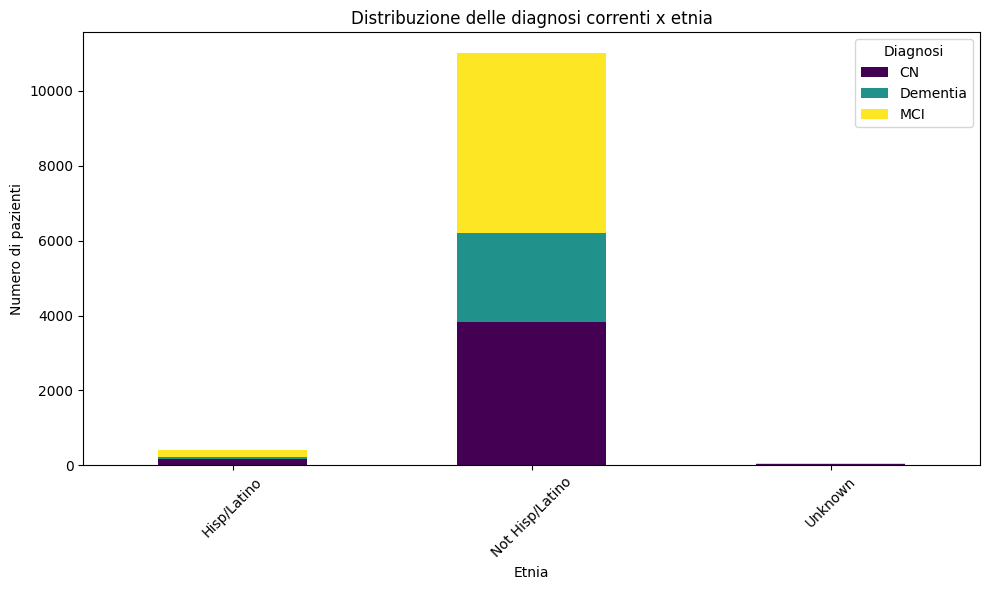

In [24]:
etnia_dx.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuzione delle diagnosi correnti x etnia')
plt.xlabel('Etnia')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

Notiamo quindi che, a prescindere dalle comparazioni che sono viziate dal fatto che i non ispanici/latini sono la maggior parte dei pazienti (quindi trovano il tempo che trovano), le diagnosi correnti per tutte le etnie indistintamente mostrano una prevalenza di demenza in stato intermedio e di pazienti sani. Le diagnosi, in generale, più comuni sono MCI (cresciuta significativamente rispetto alla baseline) e Dementia (aumentata in misura minore). La diagnosi di CN invece si è ridotta rispetto alla baseline. <br>
<b>CONFRONTI e CONCLUSIONI:</b><br>
La diagnosi CN si è ridotta rispetto alla baseline, indicando una progressione verso diagnosi più gravi. Inoltre, molti pazienti con diagnosi lievi (SMC ed EMCI) sono progrediti verso MCI. La diagnosi di dementia è aumentata seguendo una progressione più lenta. <br>
La differenza tra le etnie ci sono, ma seguono pattern simili nella progressione della malattia. La categoria Hisp/Latino ha numeri decisamente più bassi, perciò l'impatto risulta momlto meno evidente.

<b>RELAZIONE TRA LE DIAGNOSI (CORRENTI e alla BASELINE) e la categoria etnica dei pazienti <br></b>
Informazioni preziose su eventuali differenze nella distribuzione delle diagnosi tra i gruppi etnici. Per capire se alcune diagnosi sono più prevalenti in determinati gruppi. Inoltre tale feature può riflettere differenze sociali (come l'accesso all'istruzione, alle cure mediche o ad altri fattori che possono favorire il declino cognitivo). Le disparità possono influenzare. 

In [25]:
race_dx = csv.groupby("PTRACCAT")["DX"].value_counts().unstack()
race_dxbl = csv.groupby("PTRACCAT")["DX_bl"].value_counts().unstack()

print(f"Distribuzione delle diagnosi alla baseline per PTRACCAT:\n {race_dxbl}")

Distribuzione delle diagnosi alla baseline per PTRACCAT:
 DX_bl                  AD      CN    EMCI    LMCI     SMC
PTRACCAT                                                 
Am Indian/Alaskan     NaN    14.0    12.0     2.0     NaN
Asian                33.0    76.0    44.0   109.0    41.0
Black                70.0   332.0    58.0   185.0   113.0
Hawaiian/Other PI     NaN     NaN     6.0     2.0     NaN
More than one        22.0    12.0    73.0    24.0    54.0
Unknown               NaN     2.0    23.0     5.0     5.0
White              1626.0  4468.0  2779.0  4948.0  1272.0


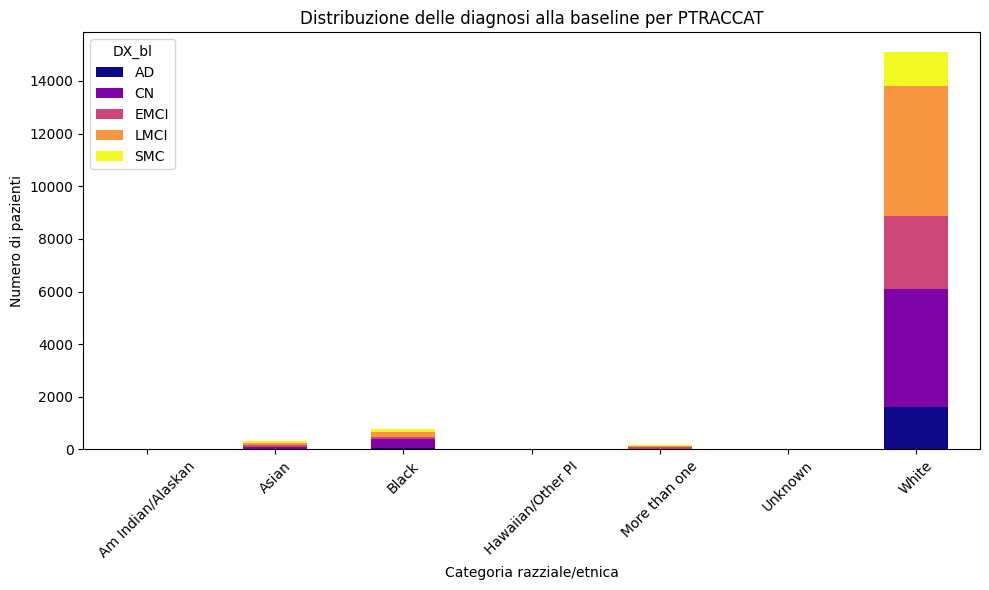

In [26]:
race_dxbl.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuzione delle diagnosi alla baseline per PTRACCAT')
plt.xlabel('Categoria razziale/etnica')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alla baseline, la maggior parte di pazienti appartiene alla categoria WHITE. Tra questi si osserva una distribuzione significativa di pazienti sani e di diagnosi di LMCI. Diagnosi più avanzate come AD sono men o comuni. ANche per la categoria BLACK c'è una maggiore prevalenza di CN alla baseline, ma ha un numero significativamente inferiore di pazienti. Anche in questo caso, le altre categorie hanno un numero troppo basso di pazienti e non è facile trarre conclusioni significative. 

In [27]:
print(f"Distribuzione delle diagnosi correnti x PTRACCAT:\n {race_dx}")

Distribuzione delle diagnosi correnti x PTRACCAT:
 DX                     CN  Dementia     MCI
PTRACCAT                                   
Am Indian/Alaskan     9.0       NaN    10.0
Asian                75.0      45.0    88.0
Black               280.0      88.0   173.0
Hawaiian/Other PI     NaN       NaN     5.0
More than one        58.0      22.0    46.0
Unknown               6.0       NaN    20.0
White              3592.0    2294.0  4647.0


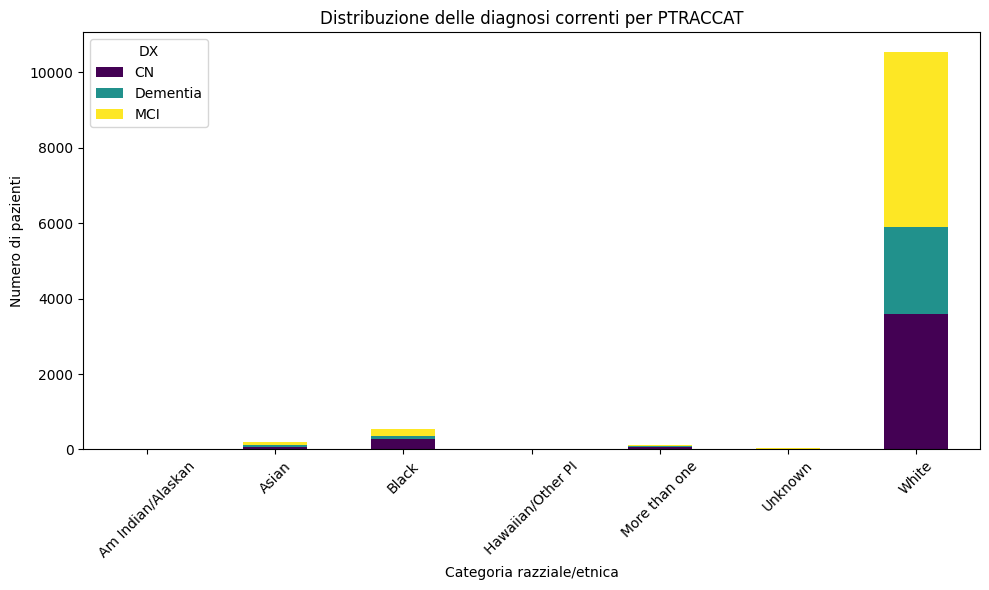

In [28]:
race_dx.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuzione delle diagnosi correnti per PTRACCAT')
plt.xlabel('Categoria razziale/etnica')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La maggior parte dei pazienti appartiene alla categoria WHITE. Tra questi c'è una prevalenza maggiore di MCI. La categoria BLACK invece ha un numero decisamente inferiore di pazienti, con una prevalenza di individui sani. Per le altre categorie, invece, il numero di pazienti è troppo piccolo per trarre conclusioni significative. In questo grafico, in particolare, si osserva una riduzione significativa delle diagnosi CN. Tali pazienti sono progrediti verso diagnosi più avanzati. Le diagnosi MCI sono aumentate quindi notevolmente. Come quelle di Dementia, ma in misura minore. ANche per i pazienti della categoria Black si osserva una riduzione delle diagnosi CN e un aumento di MCI e Dementia. Però essendoci un numero complessivo più basso, l'impatto è meno evidente. <br>
<b>CONFRONTO e CONCLUSIONI</b> <br>
Nella categoria White la progressione delle diagnosi è più evidente. Nel grafico delle diagnosi correnti si osserva un aumento delle diagnosi di DEMENTIA e MCI rispetto alla baseline, indicando progressione della malattia nel tempo. Particolarmente evidente nella categoria WHITE, che domina in termini di numero. Tali diagnosi MCI sono aumentate perchè molti pazienti con diagnosi lievi alla baseline (SMC o LMCI) sono progrediti. 

<b>DISTRIBUZIONE DELLE DIAGNOSI IN BASE ALL'ETA'</b><br>
Utile perchè può fornire info sulla progressione della malattia e sulle differenze tra le fasce d'età.

In [29]:
csv["AGE"].describe()

count    16412.000000
mean        73.214173
std          7.028099
min         50.400000
25%         68.500000
50%         73.200000
75%         78.100000
max         91.400000
Name: AGE, dtype: float64

In [30]:
csv["AGE"].value_counts()

AGE
70.6    185
72.6    180
70.9    159
76.4    152
77.9    151
       ... 
54.4      1
90.6      1
86.0      1
88.0      1
53.5      1
Name: count, Length: 350, dtype: int64

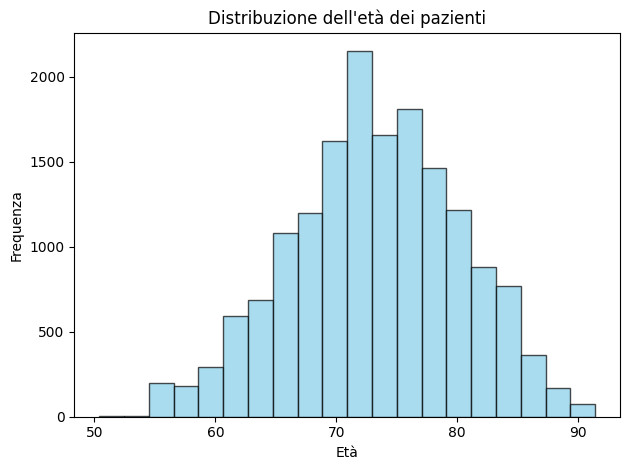

In [31]:
plt.hist(csv["AGE"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione dell\'età dei pazienti')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

L'istogramma mostra una concentrazione significativa di pazienti nella fascia d'età 70-79. Potrebbe indicare un bias verso una popolazione più anziana, che è anche la più comune per quanto riguarda le malattie neurodegenerative.

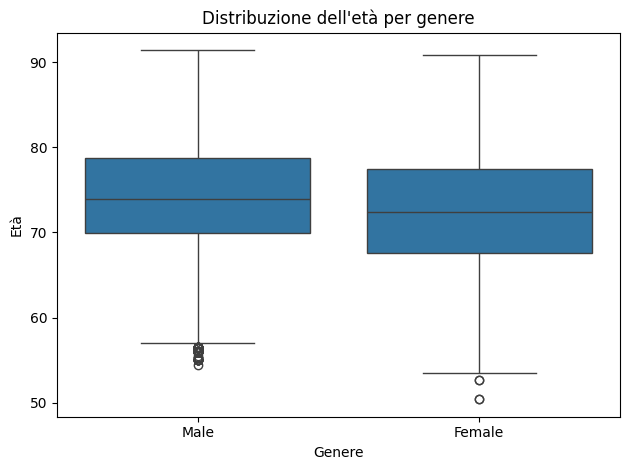

In [32]:
sns.boxplot(x="PTGENDER", y="AGE", data=csv)
plt.title('Distribuzione dell\'età per genere')
plt.xlabel('Genere')
plt.ylabel('Età')
plt.tight_layout()
plt.show()

In [33]:
bins = [50, 60, 70, 80, 90, 100] #intervalli
labels = ['50-59', '60-69', '70-79', '80-89', '90-99'] #etichette x gli intervalli

csv["AGE_GROUP"] = pd.cut(csv["AGE"], bins=bins, labels=labels)

age_dx = csv.groupby("AGE_GROUP")["DX"].value_counts().unstack()
age_dxbl = csv.groupby("AGE_GROUP")["DX_bl"].value_counts().unstack()

print(f"Distribuzione delle dx_bl x età: \n{age_dxbl}")


Distribuzione delle dx_bl x età: 
DX_bl       AD    CN  EMCI  LMCI  SMC
AGE_GROUP                            
50-59       84    66   185   202   51
60-69      338   898  1215  1330  707
70-79      859  3189  1195  2651  611
80-89      452   750   398  1080  105
90-99       18     0     0     6   11


C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_24688\819785816.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dx = csv.groupby("AGE_GROUP")["DX"].value_counts().unstack()
C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_24688\819785816.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dxbl = csv.groupby("AGE_GROUP")["DX_bl"].value_counts().unstack()


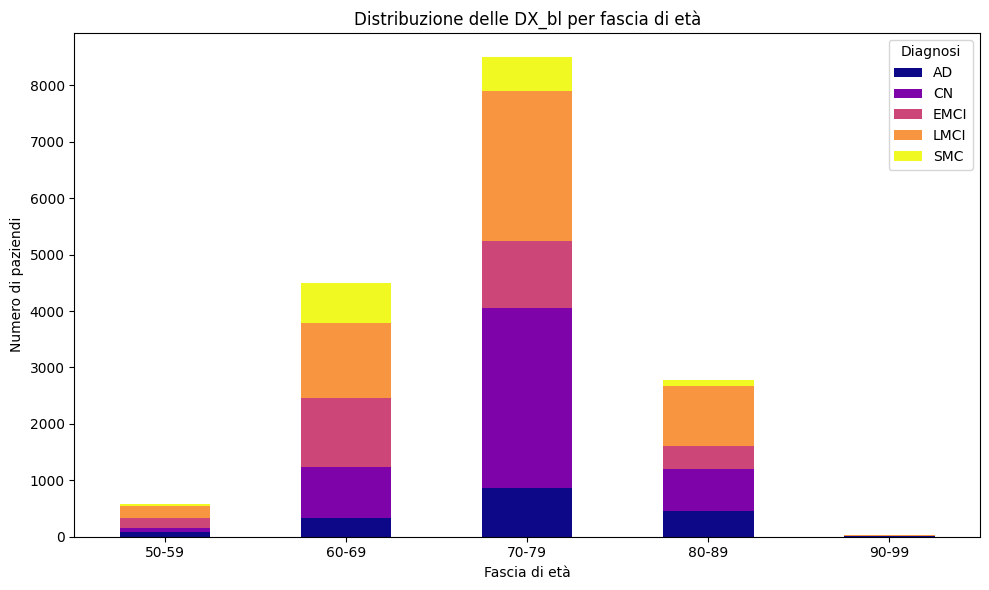

In [34]:
age_dxbl.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuzione delle DX_bl per fascia di età')
plt.xlabel('Fascia di età')
plt.ylabel('Numero di paziendi')
plt.xticks(rotation=0)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

Alla baseline, nelle fasce più giovani (da 50 a 69) abbiamo una maggiore percentuale di pazienti cognitivamente normali rispetto a quelle più anziane (il rischio di declino aumenta quindi con l'età). La maggior parte dei pazienti (50-59) è diagnosticata come CN o con diagnosi lievi. Diagnosi come AD sono rare. EMCI e LMCI (stadio intermedio tra normalità e demenza) tendono ad essere più comuni nelle fasce intermedie (da 60 a 79). Infatti nella fascia 60-69, la diagnosi predominante è sempre CN, ma c'è un aumento delle diagnosi lievi. La fascia 70-79 (che ha il maggior numero di pazienti) vede sempre predominante la diagnosi CN, ma con aumento significativo anche delle diagnosi avanzate di AD. Le diagnosi di alzheimer invece sono generalmente più frequenti nelle fasce (da 80 a 99), poichè il rischio di malattia aumenta con l'età. Infatti dalla fascia 80-89 si osserva una riduzione delle diagnosi di CN, EMCI ed LMCI, con un aumento dell'Alzheimer. Infine, nella fascia 90-99 abbiamo pochissimi pazienti, ma le diagnosi di AD sono predominanti.

In [35]:
print(f"Distribuzione delle dx x età: \n{age_dx}")

Distribuzione delle dx x età: 
DX           CN  Dementia   MCI
AGE_GROUP                      
50-59        98       111   216
60-69      1148       523  1478
70-79      2258      1274  2366
80-89       512       529   915
90-99         3        12     8


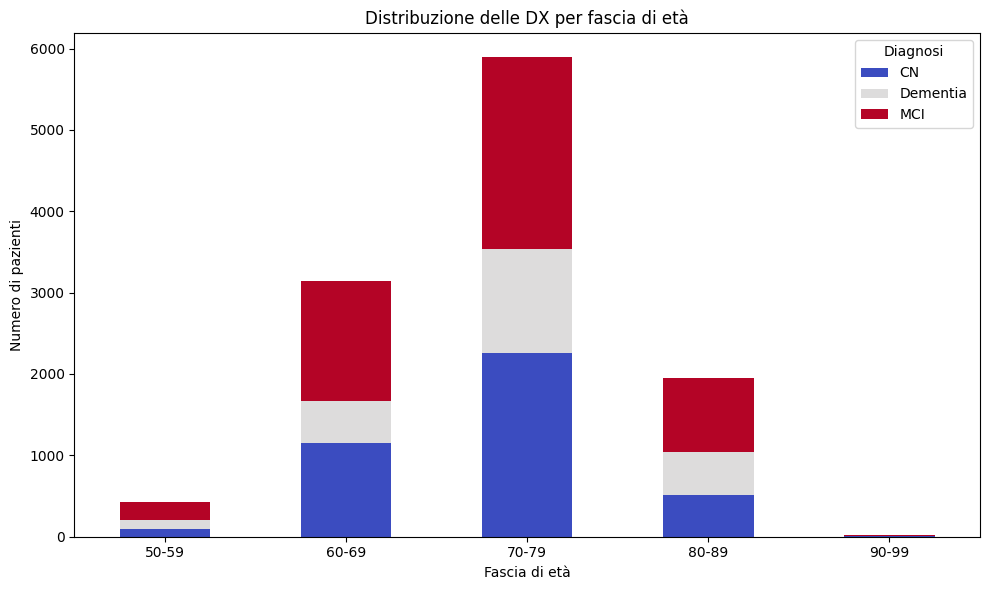

In [36]:
age_dx.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribuzione delle DX per fascia di età')
plt.xlabel('Fascia di età')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=0)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()


Nella fascia 50-59, la maggior parte dei pazienti rimane CN, con un leggere aumento delle diagnosi MCI. La Dementia è rara. Le fasce di età intermedie (60-69, 70-79) tendono ad avere una maggiore prevalenza di diagnosi sane e di stadio intermedio della malattia. Nello specifico, la fascia 60-69 mostra una riduzione delle diagnosi CN rispetto alla baseline. Le diagnosi MCI aumentano significativmanete. Nella fascia 70-79 (col maggior numero di pazienti) la progressione della malattia è più evidente. Riduzione significativa della diagnosi CN, con aumento marcato delle diagnosi MCI e Dementia. Tolte però, quindi queste 2 fasce intermedie che mostrano la maggiore concentrazione di pazienti, le fasce di età più avanzate (80-89, 90-99) hanno una maggiore prevalenza di demenza (che indica una progressione della malattia con l'età). Nella fascia 80-89 le diagnosi Cn sono ridotte rispetto alla baseline, dominano quelle di MCI e Dementia (quest'ultima è aumentata significativamente rispetto alla baseline). Infine nella fascia 90-99 i pazienti sono pochissimi, la Dementia è la diagnosi predominante (CN ed MCI sono diminuite). <br>
<b>CONCLUSIONI e CONFRONTI</b><br>
In tutte le fasce, si osserva una riduzione delle diagnosi CN dalla baseline alle correnti. Quindi i pazienti cognitivamente normali sono progrediti col tempo verso diagnosi più avanzate. Le diagnosi di MCI aumentano significativamente in tutte le fasce, specialmente tra i 60 e i 79. Molti pazienti con diagnosi lievi alla baseline sono progrediti verso MCI. Le diagnosi di Dementia aumentano in tutte le fasce, ma più evidenti nelle fasce più anziane. Tale progressione è quindi più lenta, ma diventa predominante nelle fasce più avanzate. <br>
L'età è quindi un fattore chiave nella progressione delle malattie cognitive, con un'accelerazione nelle fasce più avanzate.



<b>DISTRIBUZIONE DELLE DIAGNOSI IN BASE ALLO STATO CIVILE</b><br>
Analizzare tale distribuzione può essere utile perchè lo stato civile dei pazienti potrebbe influenzare la progressione della malattia, poichè riflette fattori come il supporto sociale, lo stress o l'isolamento che hanno impatto sulla salute. Le persone sposate o con un partner potrebbero avere un rischio di declino cognitivo più ridotto. Le persone single o divorziate potrebbero essere più a rischio di demenza invece. Inoltre, potrebbe essere interessante analizzare anche l'interazione tra gender e stato civile in relazione alle diagnosi.

In [37]:
csv["PTMARRY"].value_counts()

PTMARRY
Married          12524
Widowed           1873
Divorced          1414
Never married      549
Unknown             60
Name: count, dtype: int64

Quindi c'è un bias nel csv, per un palese disequilibrio verso i pazienti sposati

In [38]:
status_dx = csv.groupby("PTMARRY")["DX"].value_counts().unstack()
status_dx_bl = csv.groupby("PTMARRY")["DX_bl"].value_counts().unstack()

print(f"Distribuzione delle dx_bl x stato civile: \n{status_dx_bl}")

Distribuzione delle dx_bl x stato civile: 
DX_bl              AD      CN    EMCI    LMCI     SMC
PTMARRY                                              
Divorced         60.0   469.0   346.0   363.0   173.0
Married        1470.0  3499.0  2305.0  4177.0  1067.0
Never married    49.0   239.0   106.0    62.0    92.0
Unknown           NaN     7.0    35.0    16.0     2.0
Widowed         172.0   690.0   202.0   657.0   151.0


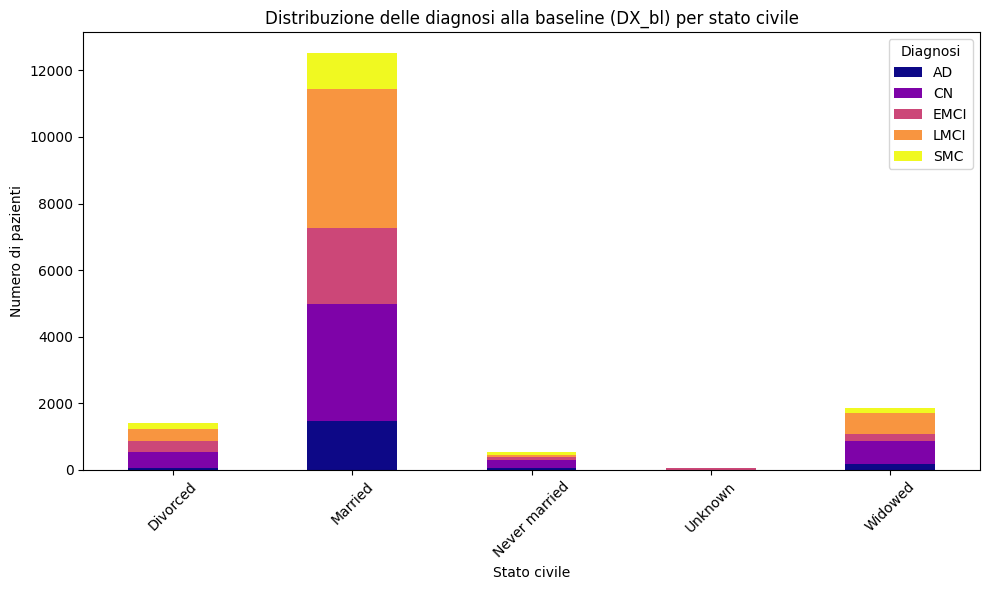

In [39]:
status_dx_bl.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuzione delle diagnosi alla baseline (DX_bl) per stato civile')
plt.xlabel('Stato civile')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

La maggior parte dei pazienti è sposata. Tra questi c'è una significativa distribuzione di diagnosi CN, EMCI e LMCI (molto alta). Alla baseline la diagnosi predominante è CN, diagnosi più avanzate come AD sono meno comuni. <br>
Per i divorziati è simile la distribuzione, ma sono un numero molto inferiore rispetto agli sposati e la diagnosi AD è la meno frequente. <br>
Distribuzione di diagnosi simile anche per i vedovi, con una significativa presenza anche di AD. Anche per i mai sposati la distribuzione di diagnosi è simile (ma ha ochissimi pazienti), ma la LMCI è insolitamente meno frequente rispetto agli altri casi. <br>
I pazienti con stato civile sconosciuto, infine, sono troppo pochi per conclusioni significative.

In [40]:
print(f"Distribuzione delle dx x stato civile: \n{status_dx}")

Distribuzione delle dx x stato civile: 
DX                 CN  Dementia     MCI
PTMARRY                                
Divorced        421.0     106.0   469.0
Married        2878.0    2037.0  3817.0
Never married   215.0      52.0   121.0
Unknown           7.0       NaN    39.0
Widowed         499.0     254.0   542.0


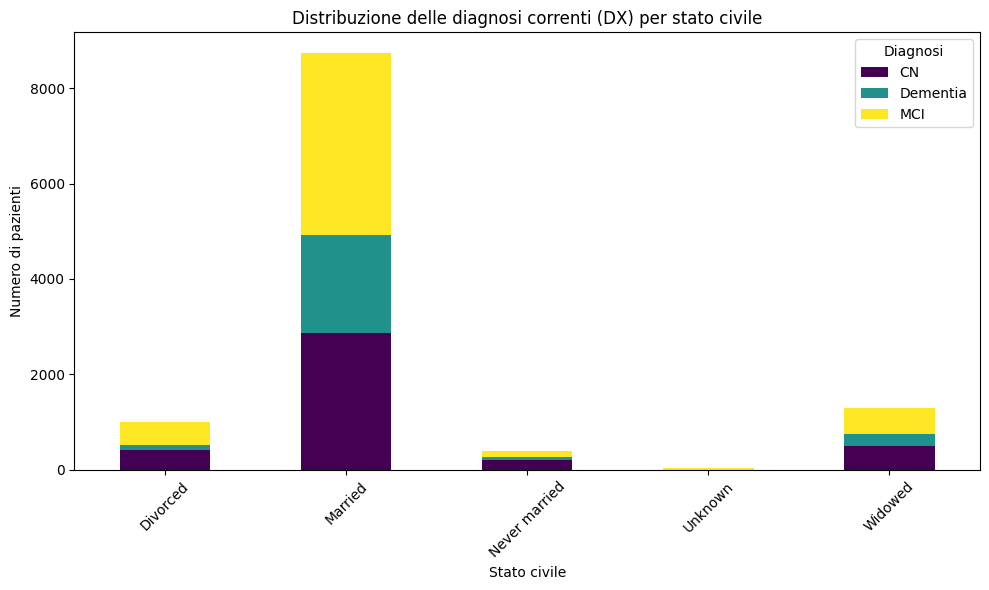

In [41]:
status_dx.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuzione delle diagnosi correnti (DX) per stato civile')
plt.xlabel('Stato civile')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

Tra i pazienti sposati si osserva una riduzione significativa delle diagnosi CN, indicando che dalla baseline poi sono progrediti verso una diagnosi più avanzata. Inoltre, tra questi c'è una significativa distribuzione di diagnosi MCI (spicca tra tutte, sono aumentate notevolmente suggerendo una progressione della malattia) e Demenza (aumentate in misura minore). <br>
Per i divorziati la situazione è simile, ma in numero inferiore, idem per i vedovi. <br> Anche per i non sposati la situazione è simile, ma tra tutte spicca la diagnosi CN (la situazione rimane pressochè simile alla baseline, con poche diagnosi avanzate). <br>
<b>CONFRONTO e CONCLUSIONI: <br></b>
In tutte le categorie si osserva una riduzione delle diagnosi CN, i pazienti sani sono progrediti verso diagnosi più gravi. La distribuzione delle diagnosi correnti mostra un aumento significativo delle diagnosi di MCI (specialmente tra gli sposati, da SMC e LMCI) e demenza (in misura minore, progressione più lenta) rispetto alla baseline, indicando una progressione della malattia tra i pazienti sposati. Idem per i divorziati, i mai sposati e i vedovi. Questi hanno pattern simili, ma con numeri inferiori. Il che rende in alcuni casi difficile trarre conclusioni significative. <br>
Da questo capiamo che lo stato civile influenza la distribuzione delle diagnosi. I pazienti sposati sembrano avere una maggiore prevalenza di diagnosi CN alla baseline (effetto protettivo iniziale). Però è evidente anche una certa preogressione verso la demenza e la MCI, nel tempo, per tutti i gruppi. 


<b>DISTRIBUZIONE DELLE DIAGNOSI IN BASE AGLI ANNI DI FORMAZIONE </b><br>
Un'analisi del rapporto tra PTEDUCAT e le diagnosi può essere utile in quanto gli anni di formazione sono spesso considerati un indicatore del <b>"cognitive reserve"</b>, che è un altro fattore che può influenzare la vulnerabilità al declino cognitivo e alla demenza. <br>
Maggiori anni di formazione sono associati a maggiore riserva cognitiva, che può ritardare l'insorgenza di sintomi di declino. E viceverza, i pazienti con meno anni possono essere più vulnerabili al declino precoce. 

In [42]:
csv["PTEDUCAT"].describe()

count    16421.000000
mean        16.105779
std          2.762672
min          4.000000
25%         14.000000
50%         16.000000
75%         18.000000
max         20.000000
Name: PTEDUCAT, dtype: float64

In [43]:
csv["PTEDUCAT"].value_counts()

PTEDUCAT
16    3917
18    3223
20    2345
12    1856
14    1704
13     795
19     745
17     730
15     649
10     139
8      128
11      86
9       39
7       31
6       30
4        4
Name: count, dtype: int64

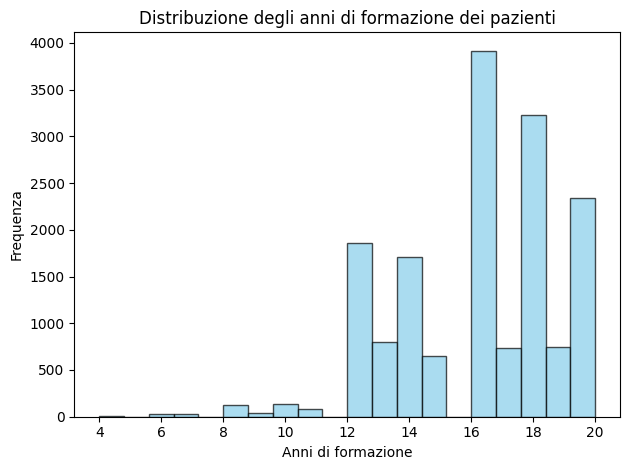

In [44]:
plt.hist(csv["PTEDUCAT"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione degli anni di formazione dei pazienti')
plt.xlabel('Anni di formazione')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

L'istogramma mostra una concentrazione significativa di pazienti tra i 12 e i 20 anni di formazione. Potrebbe indicare un bias verso una popolazione più studiata. Cioè il dataset è composto principalmente da pazienti con un livello di istruzione medio-alto. QUesto mostra uno sbilancio verso livelli medio alti, bias perchè quelli con livelli più bassi sono sottorappresentati. 

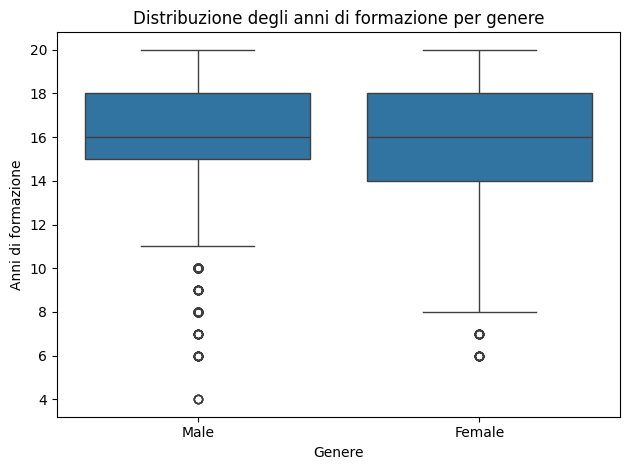

In [45]:
sns.boxplot(x="PTGENDER", y="PTEDUCAT", data=csv)
plt.title('Distribuzione degli anni di formazione per genere')
plt.xlabel('Genere')
plt.ylabel('Anni di formazione')
plt.tight_layout()
plt.show()

La mediana degli anni di formazione tra gli uomini è attorno ai 16 anni. La maggior parte dei pazienti maschi ha un livello compreso tra 14 e 18 anni. Ci sono outlier con meno di 10 anni di formazione. <br>
Anche per le donne la mediana è attorno ai 16 anni. La maggior parte ha un livello di istruzione tra i 14 e i 18 anni. Anche in questo caso ci sono outlier con meno di 10 anni di formazione. <br>
Quindi la distribuzione è simile, ma sembrano esserci più outlier nei maschi. Il livello di istruzione medio-alto è uniforme nel dataset. 

Anche in questo caso, come per l'età dei pazienti, per evitare un'eccessiva frammentazione dei dati preferisco raggruppare per fasce ed intervalli. Il grafico risulterà anche meno affolato sull'asse delle X. Evitare l'elenco troppo dettagliato di valori unici permette di osservare meglio le tendenze generali.
Inizialmente avevo pensato a 4 fasce ed intervalli. Ma da 0 a 6 anni di formazione ho notato che, nei dati a disposizione, ci fosse quasi nessun paziente perchè è raro oggi avere così pochi anni di studio. Perciò ho pensato fosse meglio accorpare questa fascia con quella immediatamente successiva (7-12).

In [46]:
bins = [0, 12, 16, 20]
labels = ['0-12', '13-16', '17-20']

csv["EDUCATION_GROUP"] = pd.cut(csv["PTEDUCAT"], bins=bins, labels=labels)

In [47]:
education_dx = csv.groupby("EDUCATION_GROUP")["DX"].value_counts().unstack()
education_dx_bl = csv.groupby("EDUCATION_GROUP")["DX_bl"].value_counts().unstack()

print(f"Distribuzione delle dx_bl x livello di istruzione: \n{education_dx_bl}")

Distribuzione delle dx_bl x livello di istruzione: 
DX_bl             AD    CN  EMCI  LMCI  SMC
EDUCATION_GROUP                            
0-12             406   436   389   957  125
13-16            812  2212  1285  2137  612
17-20            533  2256  1321  2181  748


C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_24688\724884012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_dx = csv.groupby("EDUCATION_GROUP")["DX"].value_counts().unstack()
C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_24688\724884012.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_dx_bl = csv.groupby("EDUCATION_GROUP")["DX_bl"].value_counts().unstack()


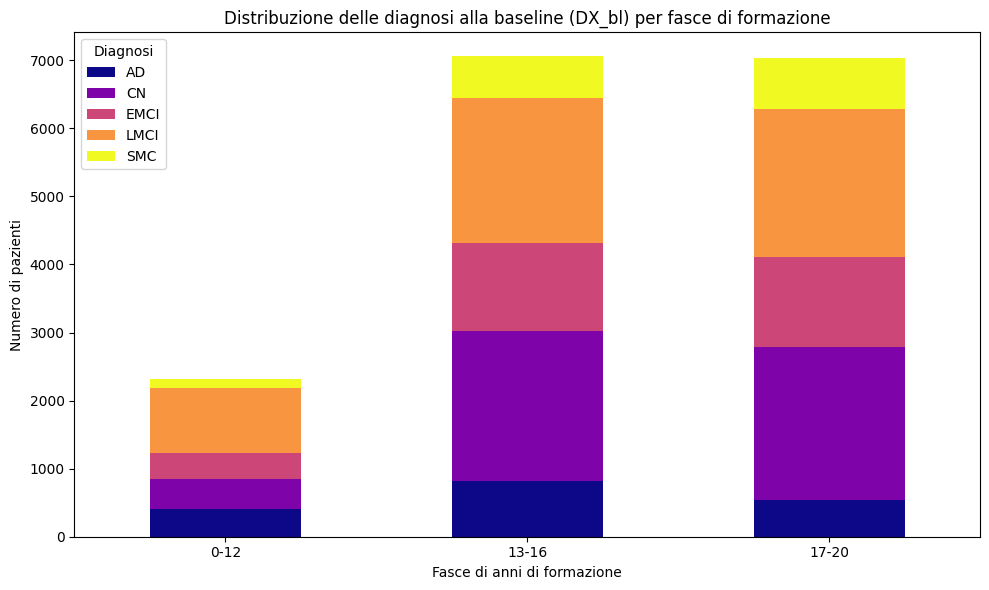

In [48]:
education_dx_bl.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuzione delle diagnosi alla baseline (DX_bl) per fasce di formazione')
plt.xlabel('Fasce di anni di formazione')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=0)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

Alla baseline la fascia 0-12 mostra una prevalenza significativa di diagnosi di LMCI, con una percentuale inferiore di pazienti normali. Le diagnosi di Alzheimer sono presenti, ma in misura minore. <br>
Invece, la fascia 13-16 è più equilibrata rispetto alla precedente, con una maggiore prevalenza di pazienti normali. Le diagnosi di EMCI ed LMCI continuano ad essere presenti in misura significativa. <br>
Infine, la fascia 17-20 ha la maggiore prevalenza di pazienti cognitivamente sani alla baselina e le altre diagnosi sono in proporzione minore rispetto alle fasce con meno anni di formazione. 

In [49]:
print(f"Distribuzione delle dx x livello di istruzione: \n{education_dx}")

Distribuzione delle dx x livello di istruzione: 
DX                 CN  Dementia   MCI
EDUCATION_GROUP                      
0-12              338       505   802
13-16            1763      1126  2079
17-20            1919       818  2108


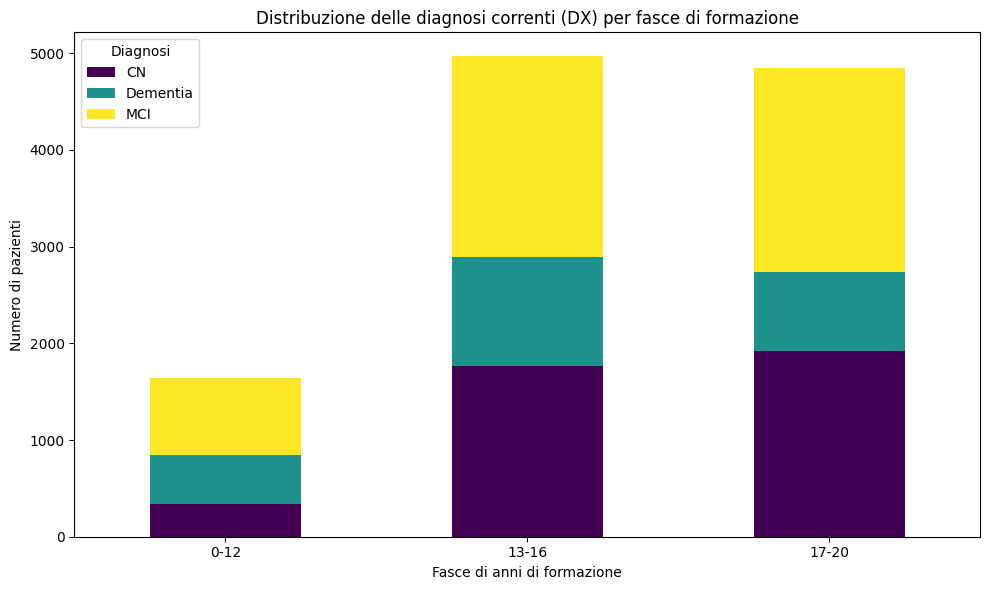

In [50]:
education_dx.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuzione delle diagnosi correnti (DX) per fasce di formazione')
plt.xlabel('Fasce di anni di formazione')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=0)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

La fascia 0-12 ha una prevalenza significativa di diagnosi di MCI e Demenza, con una percentuale significativamente inferiore di pazienti cognitivamente normali. Quindi i pazienti con meno anni di formazione sono più vulnerabili al declino. <br>
La fascia 13-16 anni presenta invece una distribuzione più equilibrata (rispetto alla precedente) con una maggiore prevalenza di pazienti normali. Tuttavia, le diagnosi di demenza e MCI sono comunque prsenti in misura significativa. <br>
La fascia 17-20, infine, ha la maggiore prevalenza di pazienti sani, suggerendo un effetto protettivo dello studio. Le diagnosi di MCI e demenza sono presenti, ma in proporzione minore rispetto alle fasce precedenti. <br> Quindi notiamo un sostanziale miglioramento con lo studio. <br>
<b>CONFRONTO e CONCLUSIONI: </b><br>
Nel grafico delle diagnosi correnti, si osserva un aumento delle diagnosi di MCI e demenza rispetto alla baseline, indicando una progressione della malattia nel tempo. Questo è evidente nella fascia 0-12, dove la vulnerabilità al declino cognitivo è maggiore. <br>
I pazienti con più anni di formazione hanno una maggiore prevalenza di diagnosi CN sia alla baseline che in quelle correnti (effetto protettivo della riserva). In queste fasce infatti, la distribuzione delle diagnosi è più equilibrata, con una progressione più lenta verso MCI e demenza. <br>
Questi risultati sottolineano l'importanza della riserva cognitiva e della vulnerabilità. Gli interventi educativi aiutano a mitigare il rischio di declino.

2) ANALISI DELLA DISTRIBUZIONE DI UNA o PIù VARIABILI X UNA TIPOLOGIA DI PAZIENTE

<b>Distribuzione dello stato civile (variabile categorica) per i pazienti con diagnosi di AD.</b><br>
Questa analisi è utile per comprendere il supporto sociale (noto per influenzare la progressione della malattia) nella gestione della malattia. Cioè un indicatore del livello di supporto per i pazienti. Ad es., i pazienti sposati potrebbero avere un caregiver (il coniuge) che fornisce assistenza, mentre i vedovi, i divorziati o i mai sposati potrebbero avere meno supporto.<br>
In questo modo si identificano i gruppi vulnerabili (divorziati, vedovi e mai sposati) a: isolamento sociale e progressione più rapida della malattia. I vedovi tendenzialmente potrebbero essere inoltre più anziani. 

In [51]:
AD_data = csv[csv["DX_bl"] == "AD"]


In [52]:
AD_marital_status = AD_data["PTMARRY"].value_counts()
print(f"Stato civile dei pazienti con diagnosi AD: \n{AD_marital_status}")

Stato civile dei pazienti con diagnosi AD: 
PTMARRY
Married          1470
Widowed           172
Divorced           60
Never married      49
Name: count, dtype: int64


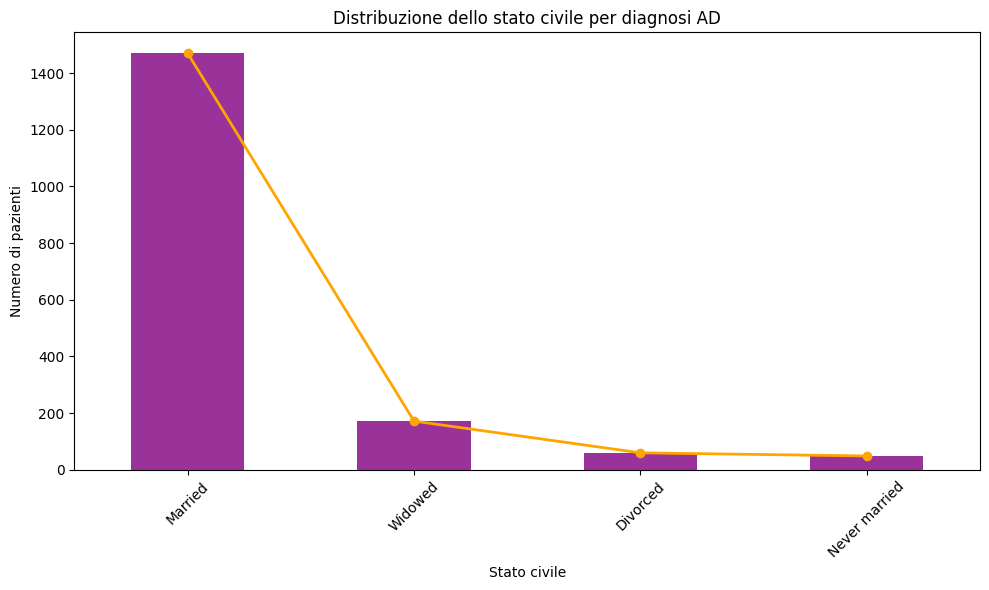

In [ ]:

x_positions = range(len(AD_marital_status))  

values = AD_marital_status.values  


AD_marital_status.plot(kind='bar', figsize=(10, 6), color='purple', alpha=0.8, label='Numero di pazienti')


plt.plot(x_positions, values, color='orange', marker='o', linestyle='-', linewidth=2, label='Andamento')

plt.title('Distribuzione dello stato civile per diagnosi AD')
plt.xlabel('Stato civile')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Distribuzione dello stato civile per i pazienti con Dementia</b>

In [54]:
DEMENTIA_data = csv[csv["DX"] == "Dementia"]

In [55]:
dementia_marital_status = DEMENTIA_data["PTMARRY"].value_counts()
print(f"Stato civile dei pazienti con diagnosi di demenza: \n{dementia_marital_status}")

Stato civile dei pazienti con diagnosi di demenza: 
PTMARRY
Married          2037
Widowed           254
Divorced          106
Never married      52
Name: count, dtype: int64


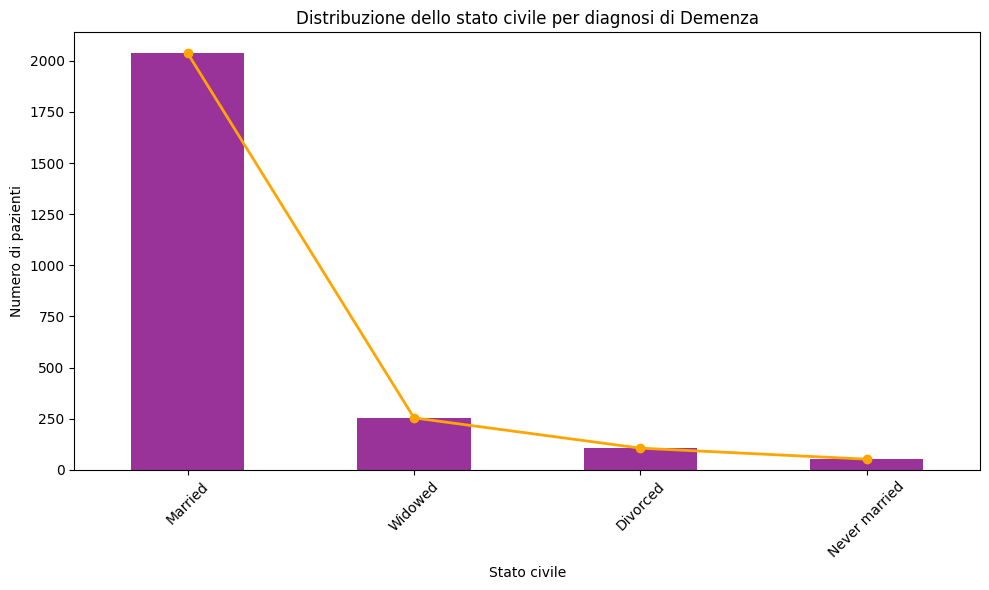

In [ ]:

x_positions = range(len(dementia_marital_status))  

values = dementia_marital_status.values  

dementia_marital_status.plot(kind='bar', figsize=(10, 6), color='purple', alpha=0.8, label='Numero di pazienti')


plt.plot(x_positions, values, color='orange', marker='o', linestyle='-', linewidth=2, label='Andamento')

plt.title('Distribuzione dello stato civile per diagnosi di Demenza')
plt.xlabel('Stato civile')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Distribuzione dell'età (variabile numerica) per i pazienti con diagnosi AD</b><br>
Utile per capire le fasce d'età più colpite, per comprendere cioè meglio il profilo demografico dei pazienti e individuare le fasce vulnerabili. L'alzheimer è più comune, ad es., nelle persone anziane (infatti la maggior parte dei pazienti rientra nelle fasce d'età avanzate dai 70 a 89 anni). L'età un fattore di rischio importante per l'Alzheimer. E' più frequente nelle persone anziane, ma ci sono anche casi (minori) di pazienti più giovani (Alzheimer ad esordio precoce).

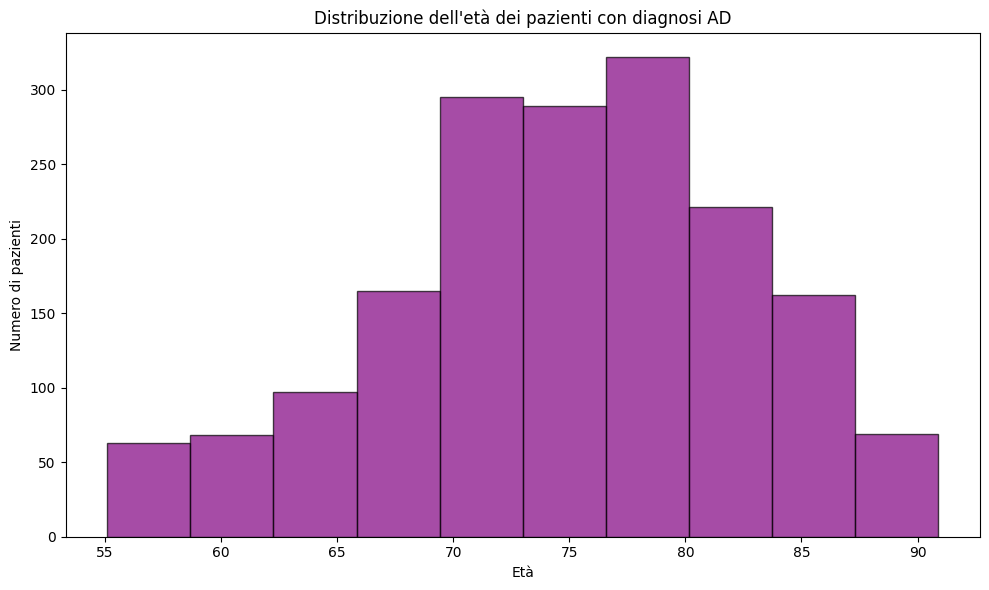

In [57]:
AD_data["AGE"].plot(kind='hist', bins=10, figsize=(10, 6), color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribuzione dell\'età dei pazienti con diagnosi AD')
plt.xlabel('Età')
plt.ylabel('Numero di pazienti')
plt.tight_layout()
plt.show()

<b>Distribuzione dell'età (variabile numerica) per i pazienti con diagnosi di Dementia</b>

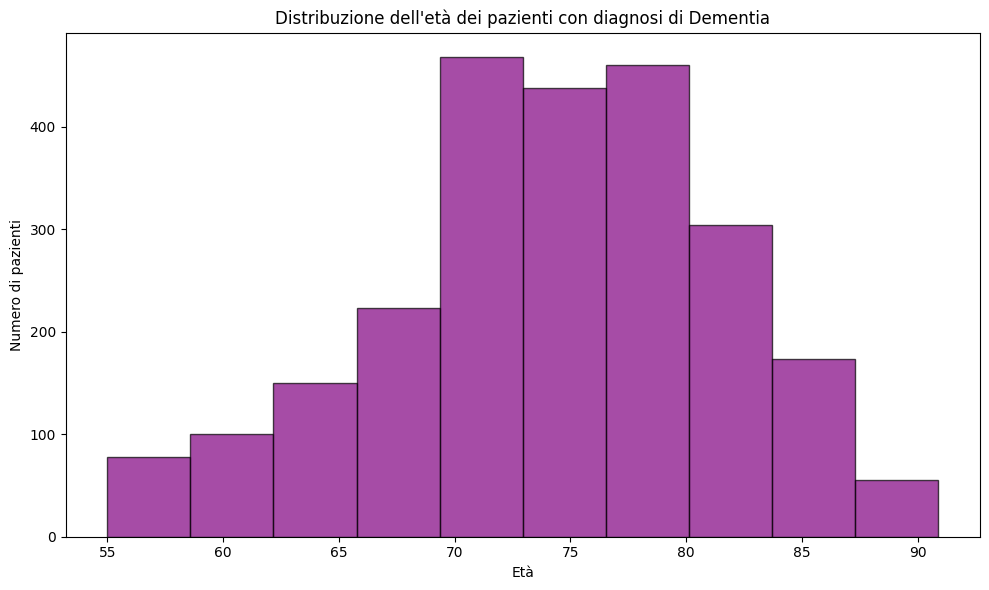

In [58]:
DEMENTIA_data["AGE"].plot(kind='hist', bins=10, figsize=(10, 6), color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribuzione dell\'età dei pazienti con diagnosi di Dementia')
plt.xlabel('Età')
plt.ylabel('Numero di pazienti')
plt.tight_layout()
plt.show()

<b>Distribuzione e relazione tra gli anni di formazione e l'età per i pazienti AD</b><br>
Questo tipo di analisi permette di comprendere il ruolo della riserva cognitiva in relazione all'età. Ad es., i pazienti più anziani potrebbero avere meno anni di formazione a causa di differenze storiche nell'accesso all'istruzione. I pazienti più giovani con diagnosi di AD potrebbero avere livelli di istruzioni più alti, ma un'insorgenza precoce della malattia. <br>
Tra i gruppi a rischio ci sono sicuramente gli anziani con pochi anni di formazione, che possono essere più vulnerabili a una progressione rapida della malattia. 

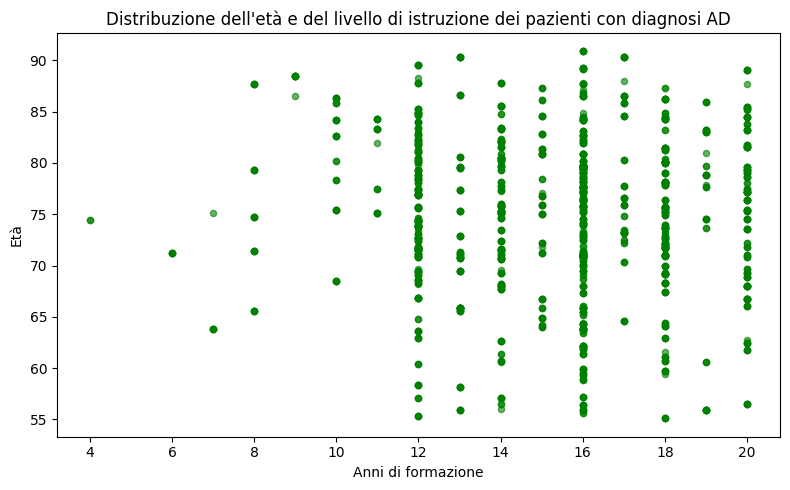

In [59]:
AD_data.plot.scatter(x="PTEDUCAT", y="AGE", figsize=(8, 5), color='green', alpha=0.6)
plt.title('Distribuzione dell\'età e del livello di istruzione dei pazienti con diagnosi AD')
plt.xlabel('Anni di formazione')
plt.ylabel('Età')
plt.tight_layout()
plt.show()

In questo caso, la maggior parte dei pazienti con AD ha tra i 10 e 20 anni di formazione. Pochi sono i pazienti con meno di 10 anni. I pazienti con AD hanno un'età principalmente distribuita tra i 65 e 90 anni. La fascia più rappresentata è 75-85. Quindi questo grafico suggerisce che un livello d'istruzione più alto da solo non basta a prevenire la malattia, ma potrebbe ritardare l'insorgenza di Alzheimer. 

<b>Distribuzione e relazione tra gli anni di formazione e l'età per i pazienti con Dementia</b>

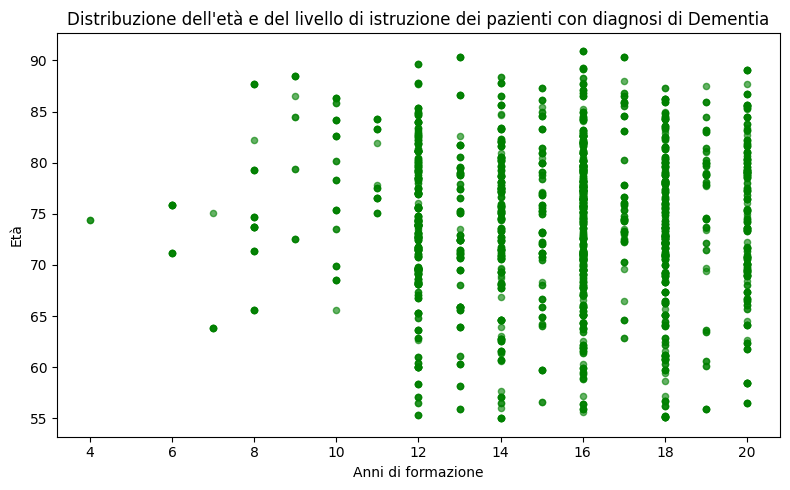

In [60]:
DEMENTIA_data.plot.scatter(x="PTEDUCAT", y="AGE", figsize=(8, 5), color='green', alpha=0.6)
plt.title('Distribuzione dell\'età e del livello di istruzione dei pazienti con diagnosi di Dementia')
plt.xlabel('Anni di formazione')
plt.ylabel('Età')
plt.tight_layout()
plt.show()

La maggior parte dei pazienti con diagnosi di demenza ha tra 10 e 20 anni di formazione, sono pochi i pazienti con meno di 10 anni di formazione. L'età di questi pazienti è distribuita principalmente tra i 65 e 90 anni, concentrandosi principalmente nella fascia 75-85. Questo grafico combinato ci permette di capire che l'istruzione non protegge totalmente dalla demenza, ma può ritardanre l'insorgenza della diagnosi. <br>
Entrambi i grafici mostrano una distribuzione simile non mostrando differenze evidenti. Quindi un livello alto di istruzione e una maggiore riserva cognitiva, non prevengono ma rallentano e ritardano la progressione. 

3. CONFRONTO TRA CN ed MCI IN BASE A CIASCUNA VARIABILE

<b>CONFRONTO TRA DIAGNOSI CORRENTI (IN BASE ALL'ETA')</b><br>
Per evidenziare le fasce d'età in cui è più probabile che i pazienti sviluppino MCI rispetto a rimanere cognitivamente normali. Questo può essere utile anche per comprendere la progressione della malattia (MCI --> anziani; CN --> giovani). Ma se ci sono, al contrario pazienti MCI in fasce più giovani abbiamo casi di deterioramento cognitivo precoce.

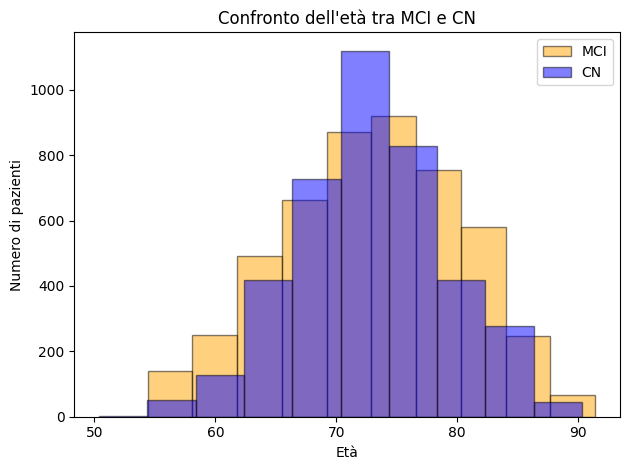

In [ ]:
mci_data = csv[csv['DX'] == 'MCI']  
cn_data = csv[csv['DX'] == 'CN']  

plt.hist(mci_data['AGE'], bins=10, alpha=0.5, label='MCI', color='orange', edgecolor='black')
plt.hist(cn_data['AGE'], bins=10, alpha=0.5, label='CN', color='blue', edgecolor='black')
plt.title('Confronto dell\'età tra MCI e CN')
plt.xlabel('Età')
plt.ylabel('Numero di pazienti')
plt.legend()
plt.tight_layout()
plt.show()

I pazienti con diagnosi MCI (arancione) sono più numerosi nelle fascia più avanzata (75-80). L'età che avanza è un fattore. Ciò indica che è un'età critica per l'insorgenza del deterioramento. I pazienti cognitivamente normali, invece, (blu) sono più numerosi nella fascia più giovane (60-70). Sovrapponendo le distribuzioni notiamo che i picchi di CN si trovano specialmente nelle fasce d'età più giovani. La distribuzione di MCI tende più verso le età avanzate, quindi conferma che l'età è un fattore di deterioramento. La fascia 70-75 invece è un vero e proprio punto critico in cui si osserva una transizione significativa tra CN ed MCI. 

<b>CONFRONTO TRA DIAGNOSI CORRENTI (in base agli anni di formazioni)</b><br>
Utile per capire se i pazienti CN tendono ad avere più anni di formazione rispetto ai pazienti MCI. Oltre però a questo è possibile che dalla sovrapposizione dei due gruppi si noti che gli anni di formazione non sono l'unico fattore determinante, appunto. Questo lo si nota nella sovrapposizione significativa, nell'istogramma, neella fascia 14-18.

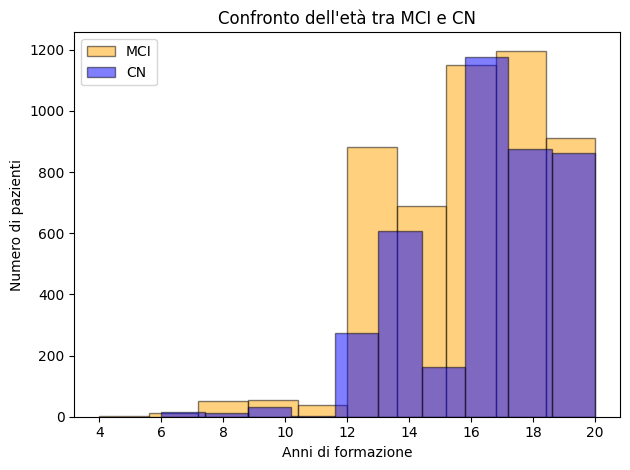

In [62]:
plt.hist(mci_data['PTEDUCAT'], bins=10, alpha=0.5, label='MCI', color='orange', edgecolor='black')
plt.hist(cn_data['PTEDUCAT'], bins=10, alpha=0.5, label='CN', color='blue', edgecolor='black')
plt.title('Confronto dell\'età tra MCI e CN')
plt.xlabel('Anni di formazione')
plt.ylabel('Numero di pazienti')
plt.legend()
plt.tight_layout()
plt.show()

Tra i 12 e i 16 anni di formazione i pazienti con MCI (arancione) sono più numerosi. Confermando la teoria della riserva cognitiva. Ma dai 16 in poi la tendenza non si conferma e quindi gli anni di formazione sono un fattore importante ma non l'unico. 

C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_24688\846442066.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DX", y="PTEDUCAT", data=csv[csv['DX'].isin(['MCI', 'CN'])], palette="Set1")


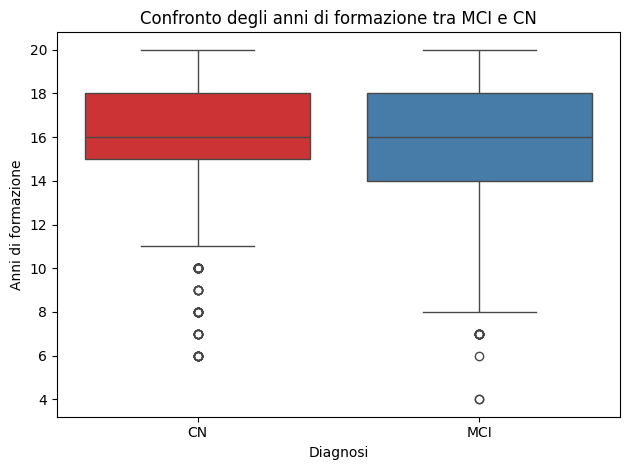

In [63]:
sns.boxplot(x="DX", y="PTEDUCAT", data=csv[csv['DX'].isin(['MCI', 'CN'])], palette="Set1")
plt.title('Confronto degli anni di formazione tra MCI e CN')
plt.xlabel('Diagnosi')
plt.ylabel('Anni di formazione')
plt.tight_layout()
plt.show()

Il boxplot mostra che la mediana degli anni di formazione è più alta per i pazienti CN. Per i pazienti MCI la mediana è leggermente inferiore. Quindi nonostante una distribuzione simile tra i due, i pazienti CN tendono ad avere un livello d'istruzione leggermente più alto. I pazienti con meno anni di formazione sembrano essere più rappresentati tra i MCI (possibile legame tra basso livello d'istruzione e deterioramento).

<b>CONFRONTO TRA DIAGNOSI CORRENTI (in base all'etnia)</b><br>
Questo tipo di confronto è utile per analizzare le eventuali differenze dovute da fattori genetici, socioeconomici o ambientali. Quindi l'eventuale accesso all'istruzione, alle cure mediche o lo stile di vita (dieta, attività fisica, ecc.) possono influenzare le differenze. 

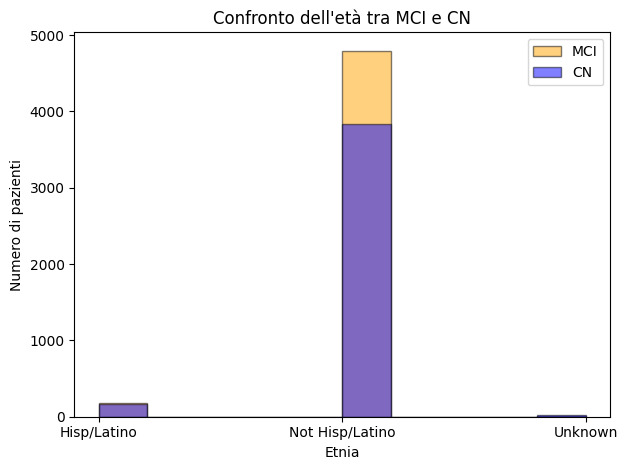

In [64]:
plt.hist(mci_data['PTETHCAT'], bins=10, alpha=0.5, label='MCI', color='orange', edgecolor='black')
plt.hist(cn_data['PTETHCAT'], bins=10, alpha=0.5, label='CN', color='blue', edgecolor='black')
plt.title('Confronto dell\'età tra MCI e CN')
plt.xlabel('Etnia')
plt.ylabel('Numero di pazienti')
plt.legend()
plt.tight_layout()
plt.show()

Purtroppo in questo caso, il bias che c'è nel disequilibrio del dataset è talmente ampio che non rende l'etnia determinante. 

<b>CONFRONTO TRA DIAGNOSI CORRENTI (in base al gender)</b>
Per capire quali tra donne e uomini sono più rappresentati tra i pazienti MCI o CN a causa di differenze biologiche, ormonali o aspettative di vita. Il genere è un fattore che può determinare. Basti pensare a fattori biologici come i cambiamenti ormonali nelle donne (menopausa) o la maggiore aspettative di vita possono aumentare i rischio di deterioramento cognitivo. Oppure i fattori cardiovascolari e metabolici, che sono più comuni negli uomini, anch'essi possono incidere. 

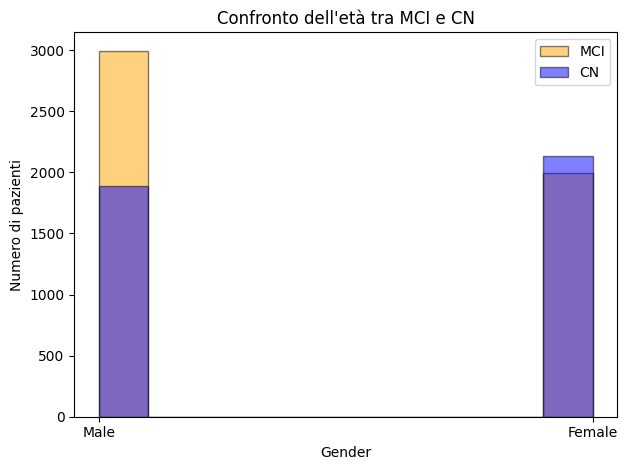

In [65]:
plt.hist(mci_data['PTGENDER'], bins=10, alpha=0.5, label='MCI', color='orange', edgecolor='black')
plt.hist(cn_data['PTGENDER'], bins=10, alpha=0.5, label='CN', color='blue', edgecolor='black')
plt.title('Confronto dell\'età tra MCI e CN')
plt.xlabel('Gender')
plt.ylabel('Numero di pazienti')
plt.legend()
plt.tight_layout()
plt.show()

Le distribuzioni non sono simili. C'è una chiara ed evidente differenza nella distribuzione e questo potrebbe confermare l'impatto del genere. La maggior parte dei pazienti maschi ha una diagnosi MCI. Questo suggerisce una vulnerabilità rispetto alle donne, le quali in maggioranza hanno una diagnosi CN (resilienza femminile). 

4) BOXPLOT DI APPROFONDIMENTO SULLE DIAGNOSI CORRENTI

<b>BOXPLOT per confrontare e analizzare la relazione e la distribuzione della variabile numerica (anni di formazione) tra le 3 diverse diagnosi correnti. </b><br>
In questo caso, riprendendo il lavoro di sopra ho voluto approfondire la relazione tra gli anni di formazione e le diagnosi, aggiungendo anche la terza (ovvero la Dementia).

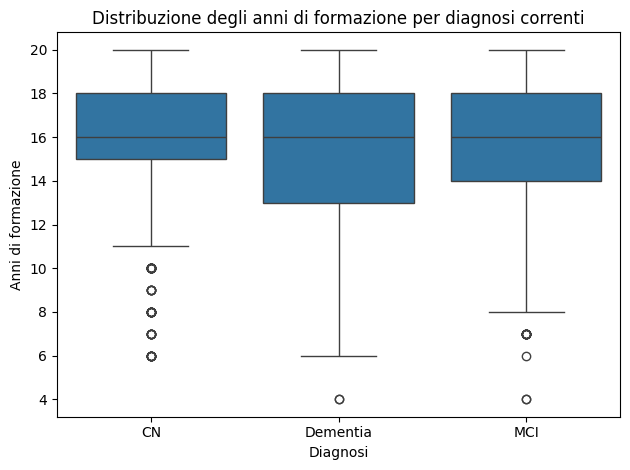

In [ ]:

sns.boxplot(x='DX', y='PTEDUCAT', data=csv[csv['DX'].isin(['MCI', 'CN', 'Dementia'])])
plt.title('Distribuzione degli anni di formazione per diagnosi correnti')
plt.xlabel('Diagnosi')
plt.ylabel('Anni di formazione')
plt.tight_layout()
plt.show()

Nel caso dei pazienti cognitivamente normali, la mediana degli anni di formazione è attorno ai 16 anni. CI sono alcuni outlier (valori anormali che si trovano al di fuori del range) con meno di 10 anni di formazione. <br>
Nel caso, invece, dei pazienti con Dementia, la mediana degli anni di formazione è attorno anch'essa ai 16 anni. Ma con una distribuzione leggermente più ampia rispetto alla precedente diagnosi, con alcuni outlier con meno di 8 anni di formazione. <br>
Infine, nel caso dei pazienti con diagnosi MCI, la mediana si attesta sempre attorno ai 16 anni e con outlier con meno di 10 anni di formazione. <br>
Quindi la mediana è simile per tutte e 3 le diagnosi, perciò il livello di istruzione medio è comparabile tra i gruppi. I pazienti con meno anni di formazione sono più comuni tra i gruppi con Dementia e MCI, indicando che il livello di istruzione più basso è associato a un rischio maggiore di declino. Sono cioè più vulnerabili. 

<b>DISTRIBUZIONE dell'età per tutte e 3 le diagnosi correnti</b>

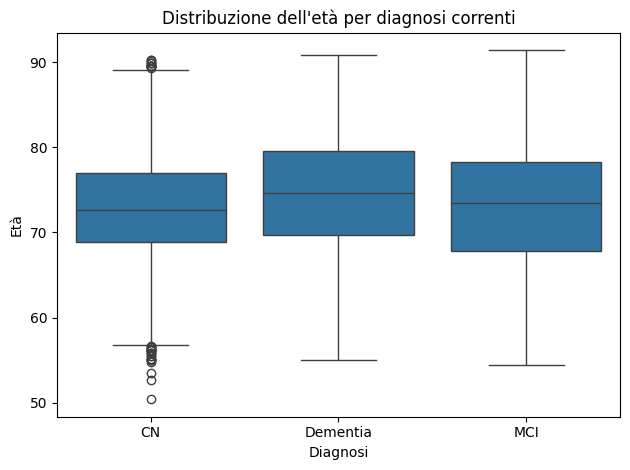

In [ ]:

sns.boxplot(x='DX', y='AGE', data=csv[csv['DX'].isin(['CN', 'Dementia', 'MCI'])])
plt.title('Distribuzione dell\'età per diagnosi correnti')
plt.xlabel('Diagnosi')
plt.ylabel('Età')
plt.tight_layout()
plt.show()

Nal caso dei pazienti cognitivamente normali la mediana dell'età è attorno ai 70 anni. La maggior parte dei pazienti di questo gruppo ha un'età compresa tra i 65 e 75 anni, ma ci sono outlier con età inferiore ai 60 anni. <br>
Invece, nel caso dei pazienti con diagnosi di dementia la mediana è leggermente più alta, attorno ai 75 anni. La maggior parte dei pazienti in questo caso ha un'età compresa tra i 70 e 80 anni. <br>
Infine, nel caso dei pazienti con diagnosi di MCI, la mediana dell'età è anche in questo caso attorno ai 75 anni. La maggior parte dei pazienti è sempre tra i 70 e 80 anni. <br>
I pazienti con diagnosi di Dementia e MCI hanno un'età leggermente più alta rispetto ai pazienti cognitivamente normali. La distribuzione dell'età, inoltre, è più ampia per i pazienti CN con più outlier verso il basso (età inferiore ai 60 anni). QUindi, in definitiva, l'età è un fattore importante per la diagnosi: i pazienti con dementia ed MCI tendono ad essere più anziani rispetto a quelli normali.